## Importing the Libraries

In [2]:
import pandas as pd
import numpy as np
import pickle
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import sklearn
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import RandomizedSearchCV
import imblearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler ,MaxAbsScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, f1_score

## Reading the dataSet

In [3]:
data=pd.read_csv("loan_data.csv")
data

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


## Visualizations

C:\Users\72081\AppData\Local\Temp\ipykernel_14816\3941809966.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['ApplicantIncome'], color='r')
C:\Users\72081\AppData\Local\Temp\ipykernel_14816\3941809966.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['Credit_History'])


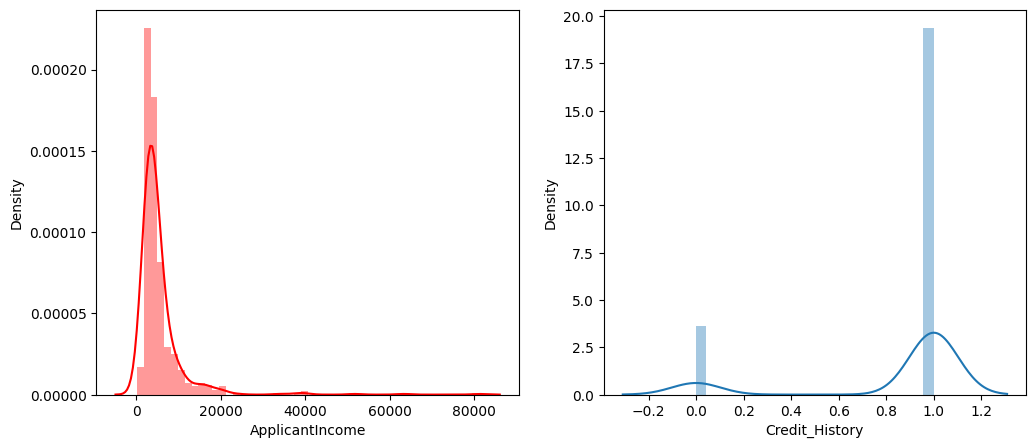

In [7]:
#plotting the using distplot
plt.figure(figsize=(12,5))
plt.subplot(121)
sns.distplot(data['ApplicantIncome'], color='r')
plt.subplot(122)
sns.distplot(data['Credit_History'])
plt.show()

ValueError: Cannot use `hue` without `x` and `y`

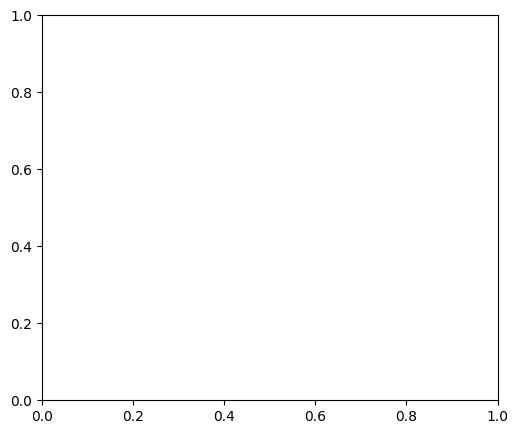

In [6]:
plt.figure(figsize=(20,5)) 
plt.subplot(131)
sns.countplot(data['Married'], hue=data['Gender'])
plt.subplot(132)
sns.countplot(data['Self_Employed'], hue=data['Education'])
plt.subplot(133)
sns.countplot(data['Property_Area'], hue=data['Loan_Amount_Term'])


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:1296: UserWarning: 67.5% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:1296: UserWarning: 33.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


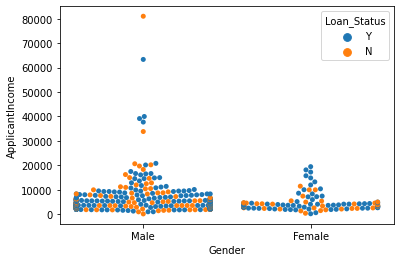

In [ ]:
sns.swarmplot(data['Gender'], data['ApplicantIncome'], hue = data['Loan_Status'])

## Data Pre-processing

In [ ]:
data.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


## Handling the Null Values

In [ ]:
data.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [ ]:
data['Gender'] = data['Gender'].fillna(data['Gender'].mode()[0])
data['Married'] = data['Married'].fillna(data['Married'].mode()[0])
#replacing + with space for filling the nan values
data['Dependents']=data['Dependents'].replace('3+',3)
data['Dependents'] = data['Dependents'].fillna(data['Dependents'].mode()[0])
data['Self_Employed'] = data['Self_Employed'].fillna(data['Self_Employed'].mode()[0])
data['LoanAmount'] = data['LoanAmount'].fillna(data['LoanAmount']. mode()[0])
data['Loan_Amount_Term'] = data['Loan_Amount_Term'].fillna(data['Loan_Amount_Term'].mode()[0])
data['Credit_History'] = data['Credit_History'].fillna(data['Credit_History'].mode()[0])

In [ ]:
data.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

## Handling the categorical columns

In [ ]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
data.Gender=le.fit_transform(data.Gender)
data.Loan_Status=le.fit_transform(data.Loan_Status)
data.Married=le.fit_transform(data.Married)
data.Education=le.fit_transform(data.Education)
data.Self_Employed=le.fit_transform(data.Self_Employed)
data.Property_Area=le.fit_transform(data.Property_Area)

In [ ]:
data

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,1,0,0,0,0,5849,0.0,120.0,360.0,1.0,2,1
1,LP001003,1,1,1,0,0,4583,1508.0,128.0,360.0,1.0,0,0
2,LP001005,1,1,0,0,1,3000,0.0,66.0,360.0,1.0,2,1
3,LP001006,1,1,0,1,0,2583,2358.0,120.0,360.0,1.0,2,1
4,LP001008,1,0,0,0,0,6000,0.0,141.0,360.0,1.0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,0,0,0,0,0,2900,0.0,71.0,360.0,1.0,0,1
610,LP002979,1,1,3,0,0,4106,0.0,40.0,180.0,1.0,0,1
611,LP002983,1,1,1,0,0,8072,240.0,253.0,360.0,1.0,2,1
612,LP002984,1,1,2,0,0,7583,0.0,187.0,360.0,1.0,2,1


In [ ]:
#changing the datype of each float column to int
data['Gender']=data['Gender'].astype('int64')
data['Married']=data['Married'].astype('int64')
data['Dependents']=data['Dependents'].astype('int64')
data['Self_Employed']=data['Self_Employed'].astype('int64')
data['CoapplicantIncome']=data['CoapplicantIncome'].astype('int64')
data['LoanAmount']=data['LoanAmount'].astype('int64')
data['Loan_Amount_Term']=data['Loan_Amount_Term'].astype('int64')
data['Credit_History']=data['Credit_History'].astype('int64')

## Balancing the Dataset

In [ ]:
#Balancing the dataset by using smote
from imblearn.combine import SMOTETomek
smote = SMOTETomek (0.95)
y = data['Loan_Status']
x = data.drop(columns=["Loan_ID",'Loan_Status'], axis=1)
x_bal,y_bal =smote.fit_resample(x,y)
print(y.value_counts())
print(y_bal.value_counts())

1    422
0    192
Name: Loan_Status, dtype: int64
1    366
0    344
Name: Loan_Status, dtype: int64


/usr/local/lib/python3.7/dist-packages/imblearn/utils/_validation.py:591: FutureWarning: Pass sampling_strategy=0.95 as keyword args. From version 0.9 passing these as positional arguments will result in an error
  FutureWarning,


## Scaling the Data

In [ ]:
sc=MaxAbsScaler()
x_bal_scaled=sc.fit_transform(x_bal)
x_bal_scaled = pd.DataFrame(x_bal,columns=x.columns)

In [ ]:
x_bal_scaled

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,1,0,0,0,0,5849,0,120,360,1,2
1,1,1,1,0,0,4583,1508,128,360,1,0
2,1,1,0,0,1,3000,0,66,360,1,2
3,1,1,0,1,0,2583,2358,120,360,1,2
4,1,0,0,0,0,6000,0,141,360,1,2
...,...,...,...,...,...,...,...,...,...,...,...
705,1,0,0,0,0,14263,0,222,360,0,1
706,0,0,1,0,0,4714,0,88,360,1,0
707,1,1,0,0,0,8481,0,191,360,0,1
708,1,0,2,0,0,4049,0,112,239,0,1


## Processed Data 

In [ ]:
final_df=pd.concat([x_bal_scaled,y_bal],axis=1)

In [ ]:
final_df

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1,0,0,0,0,5849,0,120,360,1,2,1
1,1,1,1,0,0,4583,1508,128,360,1,0,0
2,1,1,0,0,1,3000,0,66,360,1,2,1
3,1,1,0,1,0,2583,2358,120,360,1,2,1
4,1,0,0,0,0,6000,0,141,360,1,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...
705,1,0,0,0,0,14263,0,222,360,0,1,0
706,0,0,1,0,0,4714,0,88,360,1,0,0
707,1,1,0,0,0,8481,0,191,360,0,1,0
708,1,0,2,0,0,4049,0,112,239,0,1,0


## Saving into train test datasets

In [ ]:
train,test = train_test_split(final_df, test_size=0.33, random_state=42)

In [ ]:
train.to_csv('train.csv',encoding='utf-8',index=False)
test.to_csv('test.csv',encoding='utf-8',index=False)

## Splitting the data

In [ ]:
x=final_df.drop(["Loan_Status"],axis=1)

In [ ]:
x

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,1,0,0,0,0,5849,0,120,360,1,2
1,1,1,1,0,0,4583,1508,128,360,1,0
2,1,1,0,0,1,3000,0,66,360,1,2
3,1,1,0,1,0,2583,2358,120,360,1,2
4,1,0,0,0,0,6000,0,141,360,1,2
...,...,...,...,...,...,...,...,...,...,...,...
705,1,0,0,0,0,14263,0,222,360,0,1
706,0,0,1,0,0,4714,0,88,360,1,0
707,1,1,0,0,0,8481,0,191,360,0,1
708,1,0,2,0,0,4049,0,112,239,0,1


In [ ]:
y=final_df.Loan_Status
y

0      1
1      0
2      1
3      1
4      1
      ..
705    0
706    0
707    0
708    0
709    0
Name: Loan_Status, Length: 710, dtype: int64

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

## Building the Models

## Descision tree

In [ ]:
def decisionTree(x_train, x_test, y_train, y_test):
    dt=DecisionTreeClassifier() 
    dt.fit(x_train,y_train) 
    yPred = dt.predict(x_test)
    print('***DecisionTreeClassifier***') 
    print('Confusion matrix')
    print(confusion_matrix(y_test,yPred)) 
    print('Classification report') 
    print(classification_report (y_test,yPred))
    print("score")
    print(dt.score(x_test,y_test))


## Random Forest

In [ ]:
def randomForest(x_train, x_test, y_train, y_test):
    rf = RandomForestClassifier() 
    rf.fit(x_train,y_train) 
    yPred = rf.predict(x_test) 
    print('***RandomForestClassifier***') 
    print('Confusion matrix')
    print(confusion_matrix(y_test,yPred))
    print('Classification report')
    print(classification_report(y_test,yPred))
    print("score")
    print(rf.score(x_test,y_test))

## KNN

In [ ]:
def KNN(x_train, x_test, y_train, y_test):
    knn = KNeighborsClassifier()
    knn.fit(x_train,y_train)
    yPred = knn.predict(x_test)
    print('***KNeighborsClassifier***') 
    print('Confusion matrix')
    print(confusion_matrix(y_test,yPred)) 
    print('Classification report')
    print(classification_report(y_test,yPred))
    print("score")
    print(knn.score(x_test,y_test))

## XGboost

In [ ]:
def xgboost(x_train, x_test, y_train, y_test):
    xg = GradientBoostingClassifier()
    xg.fit(x_train,y_train)
    yPred = xg.predict(x_test)
    print('***Gradient BoostingClassifier***') 
    print('Confusion matrix')
    print(confusion_matrix(y_test,yPred)) 
    print('Classification report')
    print(classification_report(y_test,yPred))
    print("score")
    print(xg.score(x_test,y_test))

## Comapring Models

In [ ]:
decisionTree(x_train, x_test, y_train, y_test)

***DecisionTreeClassifier***
Confusion matrix
[[47 13]
 [19 63]]
Classification report
              precision    recall  f1-score   support

           0       0.71      0.78      0.75        60
           1       0.83      0.77      0.80        82

    accuracy                           0.77       142
   macro avg       0.77      0.78      0.77       142
weighted avg       0.78      0.77      0.78       142

score
0.7746478873239436


In [ ]:
randomForest(x_train, x_test, y_train, y_test)


***RandomForestClassifier***
Confusion matrix
[[42 18]
 [ 5 77]]
Classification report
              precision    recall  f1-score   support

           0       0.89      0.70      0.79        60
           1       0.81      0.94      0.87        82

    accuracy                           0.84       142
   macro avg       0.85      0.82      0.83       142
weighted avg       0.85      0.84      0.83       142

score
0.8380281690140845


In [ ]:
KNN(x_train, x_test, y_train, y_test)

***KNeighborsClassifier***
Confusion matrix
[[43 17]
 [31 51]]
Classification report
              precision    recall  f1-score   support

           0       0.58      0.72      0.64        60
           1       0.75      0.62      0.68        82

    accuracy                           0.66       142
   macro avg       0.67      0.67      0.66       142
weighted avg       0.68      0.66      0.66       142

score
0.6619718309859155


In [ ]:
xgboost(x_train, x_test, y_train, y_test)

***Gradient BoostingClassifier***
Confusion matrix
[[38 22]
 [ 6 76]]
Classification report
              precision    recall  f1-score   support

           0       0.86      0.63      0.73        60
           1       0.78      0.93      0.84        82

    accuracy                           0.80       142
   macro avg       0.82      0.78      0.79       142
weighted avg       0.81      0.80      0.80       142

score
0.8028169014084507


## Evaluating Performance Of The Model And Saving The Model

In [ ]:
from sklearn.model_selection import cross_val_score
rf = RandomForestClassifier()
model=rf.fit(x_train,y_train)
yPred = rf.predict(x_test)
f1_score(yPred,y_test, average='weighted')
cv = cross_val_score(rf,x,y,cv=5)
np.mean(cv)

0.8338028169014085

In [ ]:
import joblib

In [ ]:
joblib.dump(model,'Loan Predection')

['Loan Predection']

In [ ]:
siva=joblib.load('Loan Predection')

In [ ]:
siva.predict([[1,1,1,0,0,4583,1508,128,360,1,0]])

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  "X does not have valid feature names, but"


array([0])